In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
kc_house_data = pd.read_csv("kc_house_data.csv" , dtype=dtype_dict)

In [4]:
wk3_kc_house_train_data = pd.read_csv("wk3_kc_house_train_data.csv" , dtype=dtype_dict)

In [5]:
wk3_kc_house_valid_data = pd.read_csv("wk3_kc_house_valid_data.csv" , dtype=dtype_dict)

In [6]:
wk3_kc_house_test_data = pd.read_csv("wk3_kc_house_test_data.csv" , dtype=dtype_dict)

In [7]:
wk3_kc_house_set_1_data = pd.read_csv("wk3_kc_house_set_1_data.csv" , dtype=dtype_dict)

In [8]:
wk3_kc_house_set_2_data = pd.read_csv("wk3_kc_house_set_2_data.csv" , dtype=dtype_dict)

In [9]:
wk3_kc_house_set_3_data = pd.read_csv("wk3_kc_house_set_3_data.csv" , dtype=dtype_dict)

In [10]:
wk3_kc_house_set_4_data = pd.read_csv("wk3_kc_house_set_4_data.csv" , dtype=dtype_dict)

Write your own function called ‘polynomial_dataframe’ (or otherwise) which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame (e.g. SFrame) with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

In [11]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = poly_dataframe['power_1']**power
    return poly_dataframe

For the remainder of the assignment we will be working with the house Sales data as in the previous notebooks. Load in the data and also sort the sales SFrame by ‘sqft_living’. When we plot the fitted values we want to join them up in a line and this works best if the variable on the X-axis (which will be ‘sqft_living’) is sorted. For houses with identical square footage, we break the tie by their prices.

In [12]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'],ascending=[True, False])
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
21332,9266700190,20150511T000000,245000.0,1.0,1.00,390.0,2000,1,0,0,...,6,390,0,1920,0,98103,47.6938,-122.347,1340.0,5100.0


In [13]:
sales['sqft_living'].max()

13540.0

In [14]:
sales.iloc[-1,[5]]

sqft_living    13540
Name: 12777, dtype: object

4. Make a 1 degree polynomial dataFrame with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data’.

5. Add sales[‘price’] to poly1_data as this will be our output variable. e.g. if you’re using dataFrames

In [15]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [16]:
poly1_data.head()

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
21332,390.0,245000.0


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg1 = LinearRegression()

In [19]:
model1 = reg1.fit(poly1_data[['power_1']] , poly1_data.price)

Next use the produce a scatter plot of the training data (just square feet vs price) and add the fitted model. e.g. with matplotlib and dataframe?:

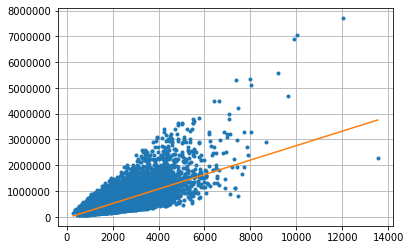

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
poly1_data['power_1'], model1.predict(poly1_data[['power_1']]),'-')
plt.grid(5)

8. Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect?



In [21]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']

In [22]:
x = poly2_data.drop('price',axis=1)
y = poly2_data.price

In [23]:
reg2 = LinearRegression()

In [24]:
model2 = reg2.fit(x , y)

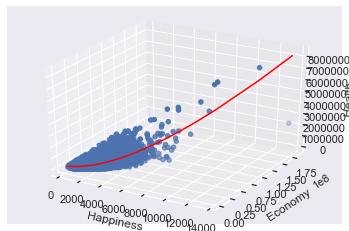

In [25]:
from mpl_toolkits.mplot3d import Axes3D

#df = pd.read_csv('2016.csv')
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = poly2_data['power_1']
y = poly2_data['power_2']
z = poly2_data['price']

ax.set_xlabel("Happiness")
ax.set_ylabel("Economy")
ax.set_zlabel("Health")

ax.scatter(x, y, z)
pred = model2.predict(poly2_data[['power_1','power_2']])
ax.plot(x,y,pred,color='red')

plt.show()

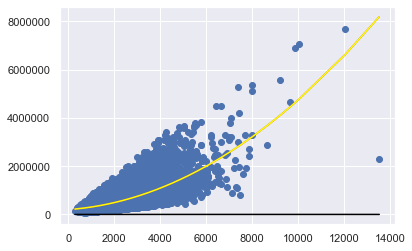

In [61]:
plt.scatter(poly2_data['power_1'] , poly2_data.price)
plt.plot(poly2_data['power_1'] , model2.predict(poly2_data[['power_1','power_2']]) , color='r')
plt.plot(sales['sqft_living'], pipe.predict(sales[['sqft_living']]) , color='yellow')
plt.plot(sales['sqft_living'], pipe.predict(sales[['sqft_living']]) -model2.predict(poly2_data[['power_1','power_2']]), color='black')


In [27]:
reg3 = LinearRegression()

In [28]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price']

In [29]:
x = poly3_data.drop('price',axis=1)
y = poly3_data.price

In [30]:
model3 = reg3.fit(x,y)

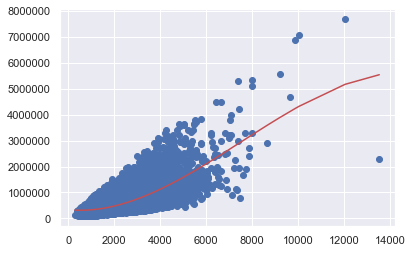

In [31]:
plt.scatter(poly3_data['power_1'] , poly3_data.price)
plt.plot(poly3_data['power_1'] , model3.predict(x) , color='r')

 Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

In [32]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']

In [33]:
reg15 = LinearRegression()

In [34]:
x = poly15_data.drop('price',axis =1)
y = poly15_data['price']

In [35]:
model4 = reg15.fit(x,y)

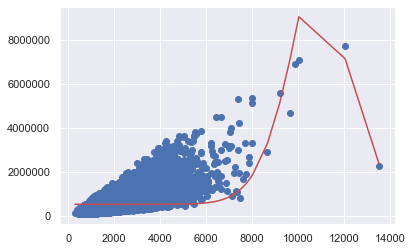

In [36]:
plt.scatter(poly15_data['power_1'] , poly15_data.price)
plt.plot(poly15_data['power_1'] , model4.predict(x) , color='r')

Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.



#### 15th degree polynoial on set1

array([ 3.05794168e-90, -1.69394900e-49,  2.35908952e-55,  1.21888065e-88,
        3.23082736e-74,  1.10358333e-70,  8.37724029e-67,  6.23411957e-63,
        4.49156442e-59,  3.06938763e-55,  1.91749300e-51,  1.01335180e-47,
        3.62176959e-44, -5.63501661e-48,  2.18641116e-52])

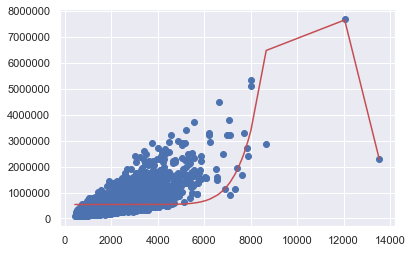

In [37]:
poly15_set_1_data = polynomial_dataframe(wk3_kc_house_set_1_data['sqft_living'], 15)
poly15_set_1_data['price'] = wk3_kc_house_set_1_data['price']

x = poly15_set_1_data.drop('price',axis =1)
y = poly15_set_1_data['price']

reg151 = LinearRegression()

model_15_1 =reg151.fit(x,y)

plt.scatter(poly15_set_1_data['power_1'] , poly15_set_1_data.price)
plt.plot(poly15_set_1_data['power_1'] , model_15_1.predict(x) , color='r')

model_15_1.coef_

#### 15th degree polynoial on set2

array([ 2.71335943e-77,  7.33542374e-39, -1.85052450e-44,  1.39207185e-49,
        5.73786189e-71,  1.51934986e-58,  3.64549609e-55,  1.50416255e-51,
        5.76015653e-48,  1.95770493e-44,  5.39396528e-41,  9.40376341e-38,
       -3.63529134e-41,  4.65476514e-45, -1.97199988e-49])

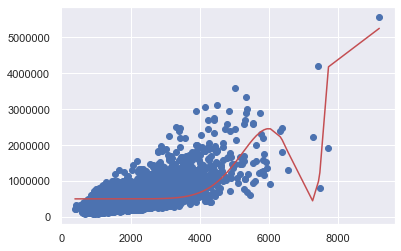

In [38]:
poly15_set_2_data = polynomial_dataframe(wk3_kc_house_set_2_data['sqft_living'], 15)
poly15_set_2_data['price'] = wk3_kc_house_set_2_data['price']

x = poly15_set_2_data.drop('price',axis =1)
y = poly15_set_2_data['price']

reg152 = LinearRegression()

model_15_2 =reg152.fit(x,y)

plt.scatter(poly15_set_2_data['power_1'] , poly15_set_2_data.price)
plt.plot(poly15_set_2_data['power_1'] , model_15_2.predict(x) , color='r')

model_15_2.coef_

#### on 3rd set

array([ 2.83751934e-88, -7.80224148e-49, -1.38766434e-55,  3.98272978e-59,
        1.57170169e-72,  4.27894908e-69,  2.68009626e-65,  1.63911362e-61,
        9.66435015e-58,  5.38044653e-54,  2.72563636e-50,  1.16253248e-46,
        3.33756141e-43, -6.76238818e-47,  3.43132932e-51])

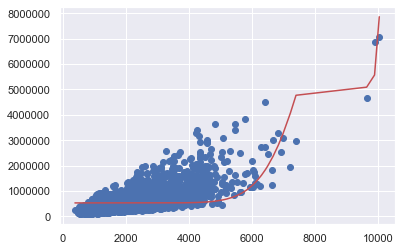

In [39]:
poly15_set_3_data = polynomial_dataframe(wk3_kc_house_set_3_data['sqft_living'], 15)
poly15_set_3_data['price'] = wk3_kc_house_set_3_data['price']

x = poly15_set_3_data.drop('price',axis =1)
y = poly15_set_3_data['price']

reg153 = LinearRegression()

model_15_3 =reg152.fit(x,y)

plt.scatter(poly15_set_3_data['power_1'] , poly15_set_3_data.price)
plt.plot(poly15_set_3_data['power_1'] , model_15_3.predict(x) , color='r')

model_15_3.coef_

### on 4th set

array([ 1.37116050e-76,  2.79678944e-40, -4.25065052e-44,  6.08163270e-50,
        2.58420332e-70,  5.29002497e-58,  1.27070045e-54,  4.87868972e-51,
        1.73549022e-47,  5.47058320e-44,  1.39587599e-40,  2.25041871e-37,
       -9.43954119e-41,  1.31573060e-44, -6.09163408e-49])

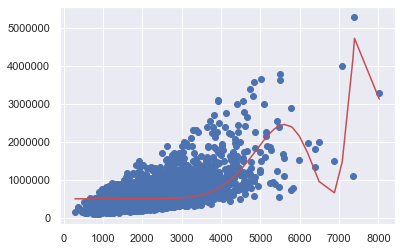

In [40]:
poly15_set_4_data = polynomial_dataframe(wk3_kc_house_set_4_data['sqft_living'], 15)
poly15_set_4_data['price'] = wk3_kc_house_set_4_data['price']

x = poly15_set_4_data.drop('price',axis =1)
y = poly15_set_4_data['price']

reg154 = LinearRegression()

model_15_4 =reg152.fit(x,y)

plt.scatter(poly15_set_4_data['power_1'] , poly15_set_4_data.price)
plt.plot(poly15_set_4_data['power_1'] , model_15_4.predict(x) , color='r')

model_15_4.coef_

#### 12. Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?

#### 13. Quiz Question: True/False the plotted fitted lines look the same in all four plots

In [41]:
rss = []
def min_rss_degree(train_data,validation_data):
    
    for i in range(1,16):
        poly_data = polynomial_dataframe(train_data['sqft_living'], i)
        poly_data['price'] = train_data['price']
        
        x = poly_data.drop('price',axis =1)
        y = poly_data['price']

        regi = LinearRegression()

        model_i =regi.fit(x,y)
        val_data = polynomial_dataframe(validation_data['sqft_living'], i)
        #val_data['price'] = wk3_kc_house_valid_data['price']
        #val_x = val_data.drop('price',axis =1)
        val_y = validation_data['price']
        y_pred = model_i.predict(val_data)
        err = np.sum((val_y-y_pred)**2) 
        rss.append(err)
        
    return rss.index(min(rss)) +1
        
        

In [42]:
min_rss_degree(wk3_kc_house_train_data,wk3_kc_house_valid_data)

6

#### 18. Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question)

In [43]:
poly_data = polynomial_dataframe(wk3_kc_house_train_data['sqft_living'], 6)
poly_data['price'] = wk3_kc_house_train_data['price']

x = poly_data.drop('price',axis =1)
y = poly_data['price']

regi = LinearRegression()

model_i =regi.fit(x,y)
val_data = polynomial_dataframe(wk3_kc_house_test_data['sqft_living'], 6)
#val_data['price'] = wk3_kc_house_valid_data['price']
#val_x = val_data.drop('price',axis =1)
val_y = wk3_kc_house_test_data['price']
y_pred = model_i.predict(val_data)
err = np.sum((val_y-y_pred)**2)
err

135225114555012.02

In [44]:
("{:e}".format(err))

'1.352251e+14'

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [51]:
#2nd order model
Input = [('scale',StandardScaler()),('polyfeature',PolynomialFeatures(degree=2)),('model',LinearRegression())]

In [52]:
pipe = Pipeline(Input)

In [53]:
type(pipe)

sklearn.pipeline.Pipeline

In [55]:
pipe.fit(sales[['sqft_living']],sales['price'])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polyfeature',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

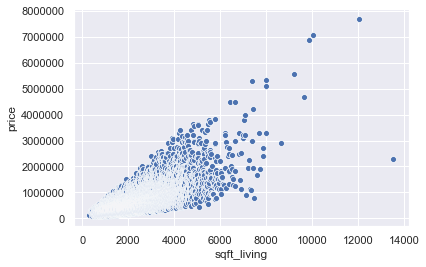

In [56]:
sns.scatterplot('sqft_living','price',data=sales)